<a href="https://colab.research.google.com/github/kemiant/Elements-of-Software-Design/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## What is EDA?

Exploratory Data Analysis (EDA) is basically a way of looking at data to get a feel for what’s going on. You use charts, graphs, and simple stats to spot patterns, trends, and any weird stuff that doesn’t fit. It’s important because it helps you understand the data before diving into deeper analysis or making decisions. With EDA, you can catch mistakes early, see relationships between things, and make sure you’re on the right track with your analysis.

Let's get set up by importing our IMBD data set from earlier using pandas:

In [ ]:
import pandas as pd
df = pd.read_csv('IMDB-Movie-Data.csv')
df['Rating Category'] = df['Rating'].apply(lambda x: 'good' if x >= 8.0 else 'bad')

In [ ]:
df.iloc[:5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


## Plotting

Pandas integrates very well with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib (`pip install matplotlib`):

In [ ]:
#pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (5, 4)}) # set standard plot size

Now we can begin. There won't be a lot of coverage on plotting, but it should be enough to explore your data easily.

**Side note:**
For categorical variables utilize Bar Charts* and Boxplots.  For numerical variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `df` with some info about how to construct the plot:

<Axes: title={'center': 'Revenue (Millions) vs Rating'}, xlabel='Rating', ylabel='Revenue (Millions)'>

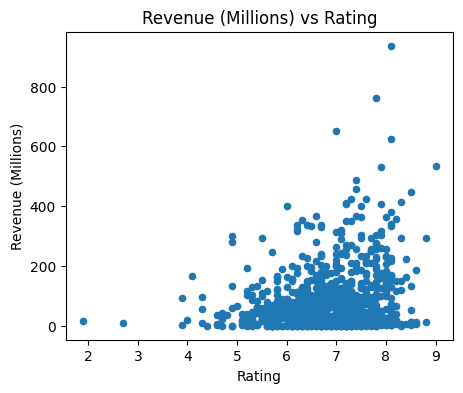

In [ ]:
df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', title='Revenue (Millions) vs Rating')

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

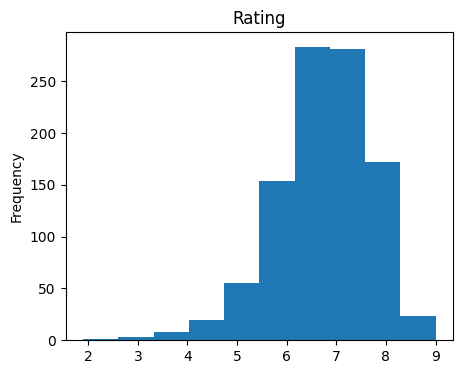

In [ ]:
df['Rating'].plot(kind='hist', title='Rating')

Do you remember the `.describe()` from the pandas workshop? Well, there's a graphical representation of the interquartile range, called the Boxplot. Let's recall what `describe()` gives us on the ratings column:

In [ ]:
df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

Using a Boxplot we can visualize this data:

<Axes: >

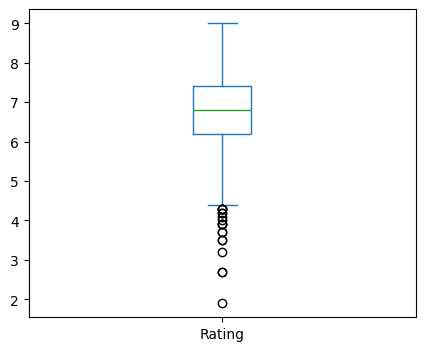

In [ ]:
df['Rating'].plot(kind="box")

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

Text(0.5, 1.0, 'Revenue (Millions) by Rating Category')

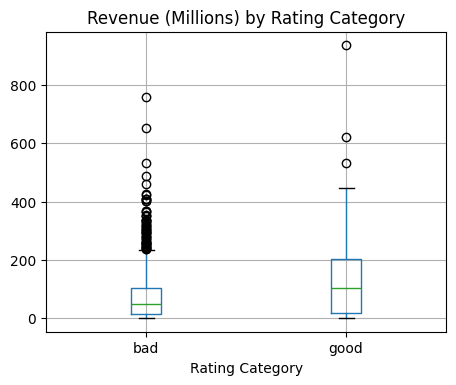

In [ ]:
df.boxplot(column='Revenue (Millions)', by='Rating Category')
plt.suptitle('')
plt.title("Revenue (Millions) by Rating Category")

## Practice Problem

#### Use a visualization to see if there is a relationship between movie runtime and rating. What do you notice?

In [ ]:
# Answer here:


## Practice Problem

#### Plot the 10 most common directors in this dataset by the number of movies they have directed

In [ ]:
# Answer here:


## Relationships Between Variables

In [ ]:
# read in the new dataset
df = pd.read_csv('greenbuildings.csv')
df.iloc[:5]

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [ ]:
# first, take a look at each variable on its own
df.describe()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,7.894000e+03,7894.000000,7.894000e+03,7820.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,4.530025e+05,588.615024,2.346377e+05,3.206720,28.418569,82.606371,13.584495,47.243983,0.379529,0.399924,...,0.086775,0.034710,0.526602,1229.354193,3432.042311,4661.396504,31.081312,0.011336,0.030959,27.497285
std,7.434053e+05,399.907509,2.975334e+05,8.162989,15.075483,21.380315,12.287083,32.194393,0.485300,0.489913,...,0.281523,0.183056,0.499323,1104.588925,1976.937255,1984.326881,11.575219,0.002406,0.008534,10.598952
min,1.000000e+00,1.000000,1.624000e+03,-24.950000,2.980000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,39.000000,0.000000,2103.000000,10.460000,0.009487,0.017800,9.000000
25%,1.574520e+05,272.000000,5.089125e+04,1.740000,19.500000,77.850000,4.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,684.000000,1419.000000,2869.000000,22.710000,0.010296,0.023300,20.000000
50%,3.132530e+05,476.000000,1.288380e+05,1.970000,25.160000,89.530000,10.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,966.000000,2739.000000,4979.000000,23.160000,0.010296,0.032737,25.145000
75%,4.411885e+05,1044.000000,2.942120e+05,2.380000,34.180000,96.440000,19.000000,79.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1620.000000,4796.000000,6413.000000,43.890000,0.011816,0.037808,34.000000
max,6.208103e+06,1230.000000,3.781045e+06,67.780000,250.000000,100.000000,110.000000,187.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5240.000000,7200.000000,8244.000000,58.020000,0.028914,0.062800,71.440000


In [ ]:
# cross-correlation check
df.corr(numeric_only = True)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
CS_PropertyID,1.000000,-0.028780,-0.092401,-0.046015,-0.154618,-0.130160,-0.091558,0.014437,-0.112270,-0.077678,...,-0.022379,0.023452,-0.168870,0.112867,0.027099,0.089826,0.022659,0.239523,0.034441,-0.190821
cluster,-0.028780,1.000000,-0.127483,-0.031753,0.172328,0.020163,-0.132625,-0.051015,-0.076874,-0.025165,...,0.026425,-0.010004,-0.072078,-0.123905,-0.195063,-0.263310,-0.176186,-0.150446,0.215165,0.217576
size,-0.092401,-0.127483,1.000000,-0.035416,0.137531,0.194326,0.826790,-0.204353,-0.000445,0.446193,...,0.094433,0.119231,0.393441,0.063058,0.151577,0.186114,0.160211,0.010329,-0.103864,-0.023940
empl_gr,-0.046015,-0.031753,-0.035416,1.000000,-0.025646,-0.039429,-0.060875,-0.084447,-0.056001,0.028179,...,0.011318,-0.006065,-0.003848,0.430737,-0.150075,0.091604,-0.253328,0.005615,-0.116926,-0.033888
Rent,-0.154618,0.172328,0.137531,-0.025646,1.000000,0.179068,0.116111,-0.102664,-0.122072,0.211198,...,0.032666,-0.050680,0.060834,-0.167939,-0.156270,-0.249173,0.066433,0.000621,0.391659,0.759340
leasing_rate,-0.130160,0.020163,0.194326,-0.039429,0.179068,1.000000,0.207707,-0.123674,-0.005346,0.207907,...,0.096251,0.029640,0.194812,-0.061631,0.018837,-0.015540,0.023877,0.021810,0.046626,0.164744
stories,-0.091558,-0.132625,0.826790,-0.060875,0.116111,0.207707,1.000000,-0.145022,0.038242,0.454083,...,0.043791,0.110169,0.388294,0.035307,0.187514,0.206470,0.192845,0.056040,-0.093030,-0.014595
age,0.014437,-0.051015,-0.204353,-0.084447,-0.102664,-0.123674,-0.145022,1.000000,0.462083,-0.504685,...,-0.224051,-0.086569,-0.244250,-0.218662,0.240773,0.118157,0.081845,-0.054667,-0.058857,-0.030051
renovated,-0.112270,-0.076874,-0.000445,-0.056001,-0.122072,-0.005346,0.038242,0.462083,1.000000,-0.172211,...,-0.105694,-0.024231,-0.006118,-0.090416,0.101815,0.051105,0.063113,-0.033919,-0.109319,-0.124306
class_a,-0.077678,-0.025165,0.446193,0.028179,0.211198,0.207907,0.454083,-0.504685,-0.172211,1.000000,...,0.249906,0.113612,0.403721,0.077657,-0.094928,-0.051346,0.064122,0.093287,0.068577,0.110642


In [ ]:
# find correlation of subset of parameters
df[['size','Rent','age','Precipitation']].corr(numeric_only=True)

,size,Rent,age,Precipitation
size,1.000000,0.137531,-0.204353,0.160211
Rent,0.137531,1.000000,-0.102664,0.066433
age,-0.204353,-0.102664,1.000000,0.081845
Precipitation,0.160211,0.066433,0.081845,1.000000


However, these numbers can be difficult to wrap your head around, especially without taking a close look. Let's now create a visualisation that gives us an easy, immediate view at the relationship between two variables.

We need to install another package in python to do this called `seaborn`. Outside of matplotlib, it is the most commonly used visualization package used in python.

In [ ]:
#pip install seaborn

<Axes: >

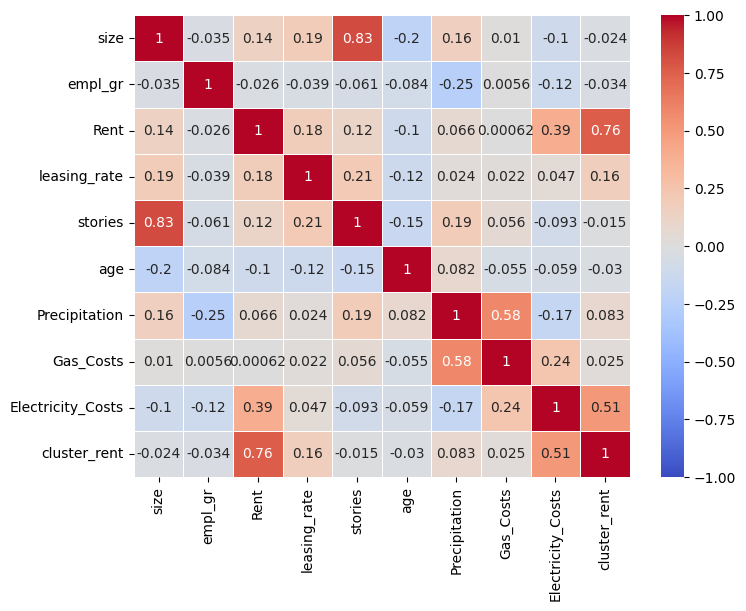

In [ ]:
import seaborn as sns
plt.rcParams.update({'figure.figsize': (8, 6)}) # make the plot bigger so it looks a little nicer
df_subset = df[['size','empl_gr','Rent','leasing_rate','stories','age','Precipitation','Gas_Costs','Electricity_Costs','cluster_rent']]
corr_matrix = df_subset.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

All of this covers correlationships between numeric variables. But what about categorical variables?

For that, we can use the `crosstab` method to summarize the distribution of different categories relative to each other.

In [ ]:
pd.crosstab(df['cluster'], df['green_rating'])

green_rating,0,1
cluster,,
1,5,1
6,9,1
8,12,1
11,4,1
13,1,1
...,...,...
1226,14,1
1227,55,1
1228,3,1


### Practice Problem

#### Are green buildings more likely to be renovated or not? What about buildings that aren't green certified?

Hint: use `green_rating` and `renovated` columns.

In [ ]:
# Answer here:


### Practice Problem

#### Describe the relationship between age of the building and rent charged to tenants.

Hint: use `age` and `Rent` columns

In [ ]:
# Answer here:


## Feature Engineering

Feature engineering is all about creating new features from your existing data to help your model learn better. It’s like giving your model extra hints or clues to understand the patterns in the data. For example, you might create ratios, interactions, or transform variables to highlight relationships that aren’t obvious at first glance. It’s important because well-engineered features can significantly boost the accuracy and performance of your models. Without good features, even the most powerful algorithms might struggle to make sense of your data. So, it’s kind of like adding some brainpower to your data!

First, let's create a new column using two existing columns:

In [ ]:
df['size per story'] = df['size'] / df['stories']

# now take a look at what happened:
df[['size', 'stories', 'size per story']]

,size,stories,size per story
0,260300,14,18592.857143
1,67861,5,13572.200000
2,164848,13,12680.615385
3,93372,13,7182.461538
4,174307,16,10894.187500
...,...,...,...
7889,1300000,41,31707.317073
7890,16140,8,2017.500000
7891,15726,6,2621.000000
7892,51300,12,4275.000000


We might also want to transform single variables. For example, let's take a look at the distribution of `Rent` prices (per sqft per month):

<Axes: title={'center': 'Distribution of Rent Prices'}, xlabel='Rent', ylabel='Count'>

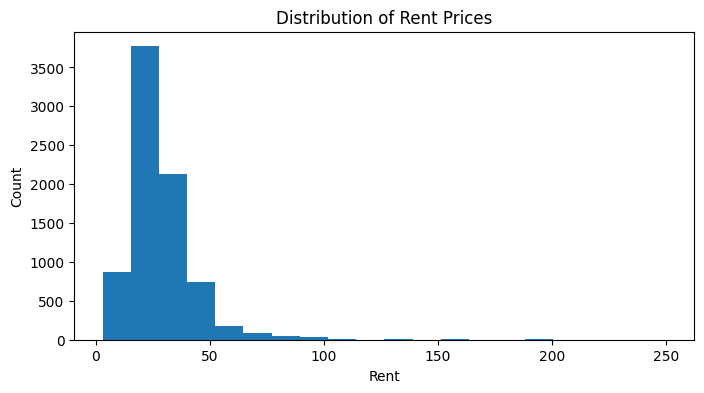

In [ ]:
plt.rcParams.update({'figure.figsize': (8, 4)})
df['Rent'].plot(kind='hist', xlabel='Rent', ylabel='Count', title='Distribution of Rent Prices', bins = 20)

This is a very skewed ditribution! This a problem that is very common among price data, especially real estate prices. Machine learning models have an extremely difficult time predicting the extreme values in the data. Additionally, the outliers may skew the model's ability to predict rent prices in the lower end of the spectrum. One common solution to this problem is to perform a log transformation. That can be performed using the `numpy` package.

In [ ]:
import numpy as np
df['Log Rent'] = np.log(df['Rent'])

Let's look at the new distribution of rent prices on a logarithmic scale:

<Axes: title={'center': 'Distribution of Log Rent Prices'}, xlabel='Log Rent', ylabel='Count'>

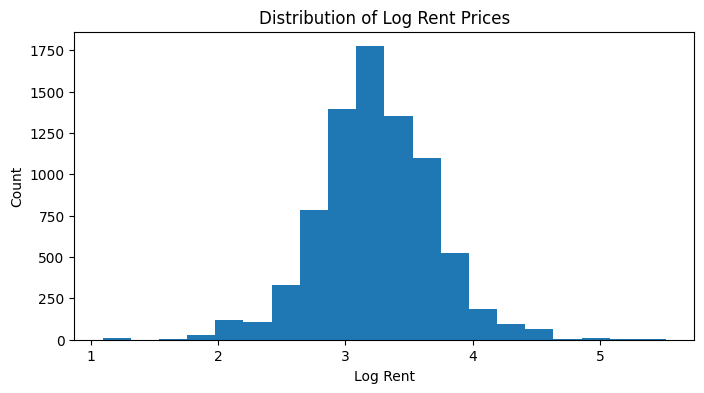

In [ ]:
df['Log Rent'].plot(kind='hist', xlabel='Log Rent', ylabel='Count', title='Distribution of Log Rent Prices', bins = 20)

Much better now! The data is more centralized and there is a much lower range of values to work with. If we're predicting `Rent` prices, we can now predict them in the log space, then exponentiate them back into their original form to get our final predicted rent price.

### Practice Problem

#### Using one or more existing columns in the data, create a new, interesting column!

In [ ]:
# Answer here:
